### Import all necessary liabraries

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
import seaborn as sn

C:\Users\vivek\AppData\Roaming\Python\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vivek\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\vivek\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Making Data Visualization

In [2]:
BATCH_SIZE = 32 
IMG_SIZE = 224

In [3]:
# Get Training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"train",
    seed= 42,
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE)

Found 1118 files belonging to 4 classes.


In [4]:
# Find classnames of training dataset
class_names = train_dataset.class_names
class_names

['0', '1', '2', '3']

In [5]:
# Get the shape of training dataset
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[2 1 1 1 1 3 3 3 0 0 1 3 0 3 2 2 2 2 3 0 2 1 1 1 0 0 3 2 2 2 0 1]


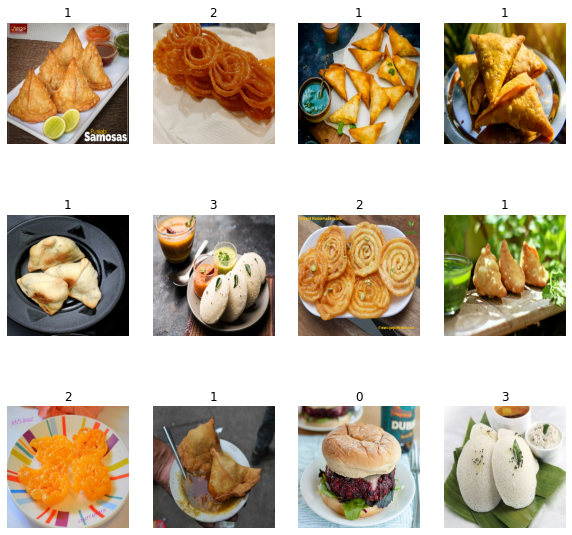

In [6]:
# Look into images of training dataset
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

### Making train and test labels

In [7]:
img_train = []
label_train = []
img_path = r'train'

for directory in os.listdir(img_path):
    for file in os.listdir(os.path.join(img_path, directory)):
        
        image_path = os.path.join(img_path, directory, file)
        image = np.array(Image.open(image_path))
        image = cv2.imread(image_path)
        image = np.array(cv2.resize(image,(45,45)))
        image = image / 255
        image = image.astype('float32')
        img_train.append(image)
        dir_int = int(directory)
        label_train.append(dir_int)

img_arr_train = np.array(img_train)
label_arr_train = np.array(label_train)

In [8]:
print(len(img_arr_train))
print(label_arr_train)

1118
[0 0 0 ... 3 3 3]


In [9]:
print(img_arr_train[0].dtype)
print(img_arr_train[0][:2])

float32
[[[0.84705883 0.7764706  0.70980394]
  [0.7254902  0.6627451  0.59607846]
  [0.8392157  0.78039217 0.7137255 ]
  [0.74509805 0.64705884 0.58431375]
  [0.8117647  0.73333335 0.6509804 ]
  [0.6666667  0.5686275  0.5058824 ]
  [0.6156863  0.5176471  0.4392157 ]
  [0.6        0.50980395 0.41960785]
  [0.81960785 0.9529412  0.8862745 ]
  [0.8392157  0.90588236 0.8784314 ]
  [0.8392157  0.92156863 0.8666667 ]
  [0.88235295 0.9254902  0.8862745 ]
  [0.6117647  0.87058824 0.80784315]
  [0.24705882 0.23137255 0.21960784]
  [0.21568628 0.21568628 0.1882353 ]
  [0.1254902  0.12156863 0.12941177]
  [0.11372549 0.14509805 0.15686275]
  [0.05882353 0.10588235 0.12156863]
  [0.3882353  0.4862745  0.56078434]
  [0.59607846 0.5294118  0.5411765 ]
  [0.64705884 0.7294118  0.7490196 ]
  [0.22352941 0.27450982 0.34509805]
  [0.04313726 0.12156863 0.24313726]
  [0.24705882 0.09803922 0.2901961 ]
  [0.6784314  0.5529412  0.6862745 ]
  [0.2        0.30980393 0.43137255]
  [0.09411765 0.17254902 0.243

In [10]:
print(len(img_arr_train))
print(label_arr_train)

1118
[0 0 0 ... 3 3 3]


Define class names accoding to image classes

In [11]:
class_names = ["Burger","Samosa","Jalebi","idli"]

# How many classes are there (this'll be our output shape)?
len(class_names)

4

0


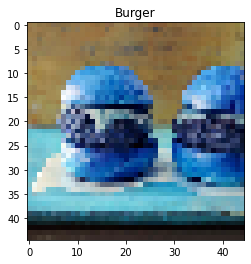

In [12]:
plt.imshow(img_arr_train[2])
print(label_arr_train[2])
#print(label_arr_train[20])
plt.title(class_names[label_arr_train[2]]);

In [13]:
print(img_arr_train.shape)

(1118, 45, 45, 3)


In [14]:
img_test = []
label_test = []
img_path = r'test'

for directory in os.listdir(img_path):
    for file in os.listdir(os.path.join(img_path, directory)):
        
        image_path = os.path.join(img_path, directory, file)
        image = np.array(Image.open(image_path))
        image = cv2.imread(image_path)
        image = np.array(cv2.resize(image,(45,45)))
        image = image / 255
        image = image.astype('float32')
        img_test.append(image)
        dir_int = int(directory)
        label_test.append(dir_int)

img_arr_test = np.array(img_test)
label_arr_test = np.array(label_test)

In [15]:
print(len(img_arr_train))
print(len(label_arr_train))
print(len(img_arr_test))
print(len(label_arr_test))

1118
1118
200
200


In [16]:
print(img_arr_train.shape)
print(img_arr_test.shape)

img_arr_train_f = img_arr_train.reshape(len(img_arr_train), 45*45*3)
img_arr_test_f = img_arr_test.reshape(len(img_arr_test), 45*45*3)

print(img_arr_train_f.shape)
print(img_arr_test_f.shape)

(1118, 45, 45, 3)
(200, 45, 45, 3)
(1118, 6075)
(200, 6075)


In [17]:
np.savetxt('train.csv', img_arr_train_f)
np.savetxt('trainLabel.csv', label_arr_train, fmt='%i')
np.savetxt('test.csv', img_arr_test_f)
np.savetxt('testLabel.csv', label_arr_test, fmt='%i')

In [18]:
print(img_arr_train_f.shape)
print(label_arr_train.shape)
print(img_arr_test_f.shape)
print(label_arr_test.shape)

(1118, 6075)
(1118,)
(200, 6075)
(200,)


load csv and lables files

In [19]:
Train = np.loadtxt('train.csv')
TrainLabels = np.loadtxt('trainLabel.csv').astype(int)
Test = np.loadtxt('test.csv')
TestLabels = np.loadtxt('testLabel.csv').astype(int)

np.random.seed(0)
np.random.shuffle(Train)
np.random.seed(0)
np.random.shuffle(TrainLabels)
np.random.seed(0)
np.random.shuffle(Test)
np.random.seed(0)
np.random.shuffle(TestLabels)

In [20]:
Model_1 = keras.Sequential()
Model_1.add(keras.Input(shape=(6075,)))
Model_1.add(keras.layers.Dense(512, activation='relu')),
Model_1.add(keras.layers.Dense(128, activation='relu')),
Model_1.add(keras.layers.Dense(4, activation='softmax'))

Model_1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

History_1 = Model_1.fit(Train, TrainLabels, validation_split=0.2, epochs=100)

Epoch 1/100
28/28 [==============================] - 3s 49ms/step - loss: 2.4846 - accuracy: 0.3960 - val_loss: 1.0245 - val_accuracy: 0.5312
Epoch 2/100
28/28 [==============================] - 1s 25ms/step - loss: 1.0479 - accuracy: 0.5481 - val_loss: 1.0195 - val_accuracy: 0.5179
Epoch 3/100
28/28 [==============================] - 1s 26ms/step - loss: 0.8864 - accuracy: 0.6130 - val_loss: 0.9108 - val_accuracy: 0.5982
Epoch 4/100
28/28 [==============================] - ETA: 0s - loss: 0.8161 - accuracy: 0.67 - 1s 25ms/step - loss: 0.8194 - accuracy: 0.6723 - val_loss: 0.8770 - val_accuracy: 0.6071
Epoch 5/100
28/28 [==============================] - 1s 26ms/step - loss: 0.8244 - accuracy: 0.6700 - val_loss: 0.9280 - val_accuracy: 0.5938
Epoch 6/100
28/28 [==============================] - 1s 33ms/step - loss: 0.7661 - accuracy: 0.7069 - val_loss: 1.0375 - val_accuracy: 0.5580
Epoch 7/100
28/28 [==============================] - 1s 35ms/step - loss: 0.7576 - accuracy: 0.7002 - val_

28/28 [==============================] - 1s 35ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0730 - val_accuracy: 0.6562
Epoch 59/100
28/28 [==============================] - 1s 36ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.0919 - val_accuracy: 0.6473
Epoch 60/100
28/28 [==============================] - 1s 37ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.1090 - val_accuracy: 0.6429
Epoch 61/100
28/28 [==============================] - 1s 37ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1151 - val_accuracy: 0.6473
Epoch 62/100
28/28 [==============================] - 1s 35ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.1401 - val_accuracy: 0.6429
Epoch 63/100
28/28 [==============================] - 1s 26ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.1294 - val_accuracy: 0.6429
Epoch 64/100
28/28 [==============================] - 1s 25ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.1544 - val_accuracy: 0.6518
Epoch 65/100

In [21]:
Model_1.evaluate(Test, TestLabels)

7/7 [==============================] - 0s 7ms/step - loss: 0.9027 - accuracy: 0.8400


[0.902650773525238, 0.8399999737739563]

need to improve model

In [22]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

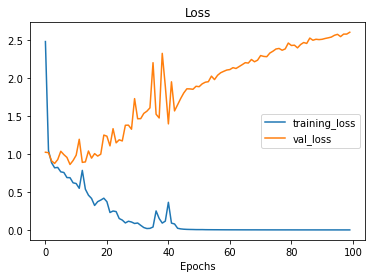

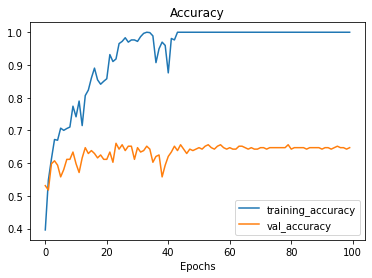

In [23]:
plot_loss_curves(History_1)

In [24]:
Model_2 = keras.Sequential()
Model_2.add(keras.Input(shape=(6075,))),
Model_2.add(keras.layers.Dense(512, activation='relu')),#add 2 dense layers
Model_2.add(keras.layers.Dense(256, activation='relu')),
Model_2.add(keras.layers.Dense(128, activation='relu')),
Model_2.add(keras.layers.Dense(64, activation='relu')),
Model_2.add(keras.layers.Dense(4, activation='softmax'))

Model_2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

History_2 = Model_2.fit(Train, TrainLabels, validation_split=0.2, epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 29ms/step - loss: 1.5196 - accuracy: 0.3758 - val_loss: 1.1911 - val_accuracy: 0.4196
Epoch 2/100
28/28 [==============================] - 1s 24ms/step - loss: 1.0359 - accuracy: 0.5391 - val_loss: 0.9753 - val_accuracy: 0.5089
Epoch 3/100
28/28 [==============================] - 1s 23ms/step - loss: 0.9605 - accuracy: 0.5727 - val_loss: 0.9771 - val_accuracy: 0.5848
Epoch 4/100
28/28 [==============================] - 1s 23ms/step - loss: 0.8777 - accuracy: 0.6365 - val_loss: 0.8830 - val_accuracy: 0.6205
Epoch 5/100
28/28 [==============================] - 1s 24ms/step - loss: 0.8208 - accuracy: 0.6723 - val_loss: 0.8448 - val_accuracy: 0.6429
Epoch 6/100
28/28 [==============================] - 1s 24ms/step - loss: 0.7992 - accuracy: 0.6723 - val_loss: 1.1238 - val_accuracy: 0.5625
Epoch 7/100
28/28 [==============================] - 1s 25ms/step - loss: 0.7817 - accuracy: 0.6879 - val_loss: 0.8451 - val_accuracy: 0.6384
Epoch 

28/28 [==============================] - 1s 48ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2977 - val_accuracy: 0.6607
Epoch 59/100
28/28 [==============================] - 1s 48ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.3973 - val_accuracy: 0.6518
Epoch 60/100
28/28 [==============================] - 1s 47ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.4598 - val_accuracy: 0.6562
Epoch 61/100
28/28 [==============================] - 1s 46ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.5544 - val_accuracy: 0.6607
Epoch 62/100
28/28 [==============================] - 1s 47ms/step - loss: 0.0084 - accuracy: 0.9966 - val_loss: 2.4959 - val_accuracy: 0.6295
Epoch 63/100
28/28 [==============================] - 1s 49ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.4720 - val_accuracy: 0.6473
Epoch 64/100
28/28 [==============================] - 1s 54ms/step - loss: 6.1295e-04 - accuracy: 1.0000 - val_loss: 2.5431 - val_accuracy: 0.6429
Epoch 65

In [25]:
Model_2.evaluate(Test, TestLabels)

7/7 [==============================] - 0s 9ms/step - loss: 1.1308 - accuracy: 0.8650


[1.13075852394104, 0.8650000095367432]

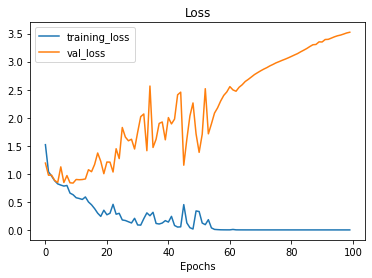

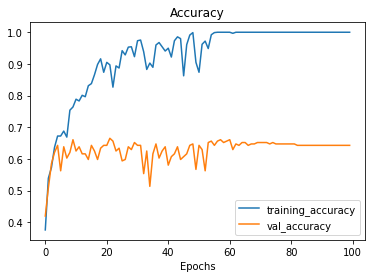

In [26]:
plot_loss_curves(History_2)

In [27]:
Model_3 = keras.Sequential()
Model_3.add(keras.Input(shape=(6075,))),
Model_3.add(keras.layers.Dense(256, activation='relu')),
Model_3.add(keras.layers.Dense(128, activation='relu')),
Model_3.add(keras.layers.Dense(4, activation='softmax'))

Model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),#add learning rate
                 metrics=["accuracy"])

History_3 = Model_3.fit(Train, TrainLabels, validation_split=0.2, epochs=150)

C:\Users\vivek\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/150
28/28 [==============================] - 2s 35ms/step - loss: 1.5932 - accuracy: 0.4519 - val_loss: 1.4161 - val_accuracy: 0.4866
Epoch 2/150
28/28 [==============================] - 1s 18ms/step - loss: 0.9568 - accuracy: 0.5817 - val_loss: 1.1512 - val_accuracy: 0.5179
Epoch 3/150
28/28 [==============================] - 1s 19ms/step - loss: 0.9290 - accuracy: 0.6007 - val_loss: 0.9367 - val_accuracy: 0.5804
Epoch 4/150
28/28 [==============================] - 1s 19ms/step - loss: 0.8946 - accuracy: 0.6588 - val_loss: 1.0211 - val_accuracy: 0.5714
Epoch 5/150
28/28 [==============================] - 1s 18ms/step - loss: 0.7681 - accuracy: 0.7170 - val_loss: 0.9478 - val_accuracy: 0.5982
Epoch 6/150
28/28 [==============================] - 0s 16ms/step - loss: 0.7896 - accuracy: 0.6745 - val_loss: 0.9959 - val_accuracy: 0.5848
Epoch 7/150
28/28 [==============================] - 0s 15ms/step - loss: 0.7061 - accuracy: 0.7226 - val_loss: 0.9442 - val_accuracy: 0.6116
Epoch 

28/28 [==============================] - 0s 15ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.0751 - val_accuracy: 0.6250
Epoch 59/150
28/28 [==============================] - 0s 15ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0739 - val_accuracy: 0.6295
Epoch 60/150
28/28 [==============================] - 0s 15ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.0997 - val_accuracy: 0.6384
Epoch 61/150
28/28 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1499 - val_accuracy: 0.6384
Epoch 62/150
28/28 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1365 - val_accuracy: 0.6562
Epoch 63/150
28/28 [==============================] - 0s 16ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1879 - val_accuracy: 0.6429
Epoch 64/150
28/28 [==============================] - 0s 16ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.1999 - val_accuracy: 0.6384
Epoch 65/150

Epoch 114/150
28/28 [==============================] - 0s 17ms/step - loss: 1.3117e-04 - accuracy: 1.0000 - val_loss: 2.9902 - val_accuracy: 0.6339
Epoch 115/150
28/28 [==============================] - 1s 18ms/step - loss: 1.2679e-04 - accuracy: 1.0000 - val_loss: 2.9962 - val_accuracy: 0.6339
Epoch 116/150
28/28 [==============================] - 1s 20ms/step - loss: 1.2306e-04 - accuracy: 1.0000 - val_loss: 3.0067 - val_accuracy: 0.6339
Epoch 117/150
28/28 [==============================] - 1s 18ms/step - loss: 1.1921e-04 - accuracy: 1.0000 - val_loss: 3.0130 - val_accuracy: 0.6339
Epoch 118/150
28/28 [==============================] - 0s 18ms/step - loss: 1.1528e-04 - accuracy: 1.0000 - val_loss: 3.0251 - val_accuracy: 0.6339
Epoch 119/150
28/28 [==============================] - 0s 17ms/step - loss: 1.1134e-04 - accuracy: 1.0000 - val_loss: 3.0461 - val_accuracy: 0.6384
Epoch 120/150
28/28 [==============================] - 1s 21ms/step - loss: 1.0872e-04 - accuracy: 1.0000 - val_

In [28]:
Model_3.evaluate(Test, TestLabels)

7/7 [==============================] - 0s 5ms/step - loss: 1.3526 - accuracy: 0.8400


[1.3526105880737305, 0.8399999737739563]

Model-3 has good accuracy

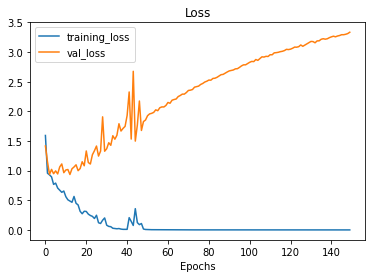

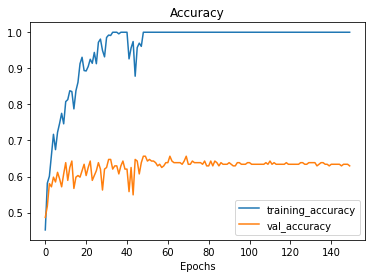

In [29]:
plot_loss_curves(History_3)

### Model 3 has better accuracy than model 2 So, will do prediction with model 3

In [30]:
#Do some predictions with our model 3
Preds = Model_3.predict(Test)
PredLabels = []
for arr in Preds:
    PredLabels.append(np.argmax(arr))
Final_Pred_Label = np.array(PredLabels)

In [31]:
print(Final_Pred_Label[:15])
print(TestLabels[:15])

[1 3 2 1 3 1 0 2 0 3 1 2 3 3 0]
[0 3 2 1 3 3 0 2 0 3 1 2 3 3 1]


### Classification Report

In [32]:
print(classification_report(TestLabels, Final_Pred_Label))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71        50
           1       0.67      0.88      0.76        50
           2       0.90      0.92      0.91        50
           3       0.96      0.98      0.97        50

    accuracy                           0.84       200
   macro avg       0.86      0.84      0.84       200
weighted avg       0.86      0.84      0.84       200



### Confusion Matrix

Text(33.0, 0.5, 'Truth')

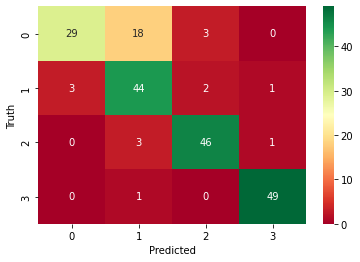

In [33]:
conf_mat = tf.math.confusion_matrix(labels=TestLabels, predictions=Final_Pred_Label)

sn.heatmap(conf_mat, annot=True, cmap='RdYlGn', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Making Confusion matrix by another way

In [34]:
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [35]:
# Make predictions with the most recent model
y_probs = Model_3.predict(Test) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[7.5006299e-03, 9.9249721e-01, 2.1317448e-06, 8.6623944e-09],
       [4.0383334e-06, 1.0859483e-08, 3.8792983e-05, 9.9995720e-01],
       [1.4798537e-06, 2.4888176e-09, 9.9999857e-01, 9.9201636e-15],
       [2.2416383e-07, 9.9999678e-01, 2.5131353e-06, 4.8669989e-07],
       [1.4711507e-07, 3.0061844e-04, 4.9779158e-07, 9.9969876e-01]],
      dtype=float32)

In [36]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(1, 'Samosa')

In [37]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([1, 3, 2, 1, 3, 1, 0, 2, 0, 3], dtype=int64)

In [38]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=TestLabels, 
                 y_pred=y_preds)

array([[29, 18,  3,  0],
       [ 3, 44,  2,  1],
       [ 0,  3, 46,  1],
       [ 0,  1,  0, 49]], dtype=int64)

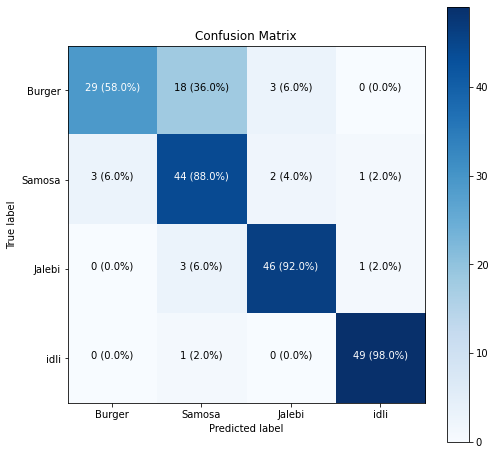

In [39]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=TestLabels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(8, 8),
                      text_size=10)

In [44]:
# save it as a h5 file


from tensorflow.keras.models import load_model

Model_3.save('model.h5')

In [46]:
y_pred = Model_3.predict(Test)

In [47]:
y_pred

array([[7.50062987e-03, 9.92497206e-01, 2.13174485e-06, 8.66239436e-09],
       [4.03833337e-06, 1.08594831e-08, 3.87929831e-05, 9.99957204e-01],
       [1.47985372e-06, 2.48881760e-09, 9.99998569e-01, 9.92016358e-15],
       [2.24163827e-07, 9.99996781e-01, 2.51313531e-06, 4.86699889e-07],
       [1.47115074e-07, 3.00618442e-04, 4.97791575e-07, 9.99698758e-01],
       [2.17193656e-06, 9.99824345e-01, 6.41742809e-05, 1.09297063e-04],
       [9.97889102e-01, 4.15698487e-05, 2.06343899e-03, 5.93432424e-06],
       [4.31155681e-13, 2.20600440e-16, 1.00000000e+00, 3.00779738e-22],
       [9.99501824e-01, 4.90339589e-04, 6.44979491e-06, 1.43221030e-06],
       [3.79202884e-11, 5.14127625e-17, 5.07069803e-14, 1.00000000e+00],
       [1.68147518e-09, 9.99999881e-01, 1.45082240e-07, 5.77213321e-12],
       [1.82753877e-12, 1.38337634e-06, 9.99998569e-01, 1.43468625e-13],
       [1.00070091e-10, 3.66472342e-13, 6.40739950e-09, 1.00000000e+00],
       [1.23499653e-13, 1.20441125e-12, 3.96886647e

In [48]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 3, 2, 1, 3, 1, 0, 2, 0, 3, 1, 2, 3, 3, 0, 1, 1, 2, 2, 1, 3, 2,
       0, 3, 1, 2, 3, 3, 2, 0, 2, 1, 3, 2, 0, 3, 2, 1, 1, 2, 2, 1, 0, 2,
       3, 1, 1, 3, 2, 3, 1, 2, 3, 1, 2, 1, 0, 3, 0, 0, 2, 1, 3, 0, 3, 1,
       1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 3, 0, 2, 3, 2, 1, 2, 1,
       2, 3, 1, 1, 3, 1, 3, 3, 3, 2, 1, 2, 3, 3, 1, 0, 1, 2, 1, 1, 3, 1,
       1, 0, 0, 1, 0, 3, 0, 3, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 3, 3, 0, 1,
       1, 2, 3, 3, 3, 1, 3, 0, 2, 2, 1, 2, 1, 0, 2, 3, 0, 2, 2, 3, 0, 0,
       2, 1, 3, 2, 0, 1, 2, 3, 0, 3, 2, 3, 0, 1, 3, 2, 0, 1, 1, 1, 2, 2,
       3, 1, 2, 1, 3, 1, 3, 3, 3, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 3, 2,
       1, 3], dtype=int64)